# Template tutorial

Description of tutorial

In [1]:
%matplotlib widget
from plantcv import plantcv as pcv
from plantcv.parallel import WorkflowInputs

/Users/nfahlgren/opt/miniconda3/envs/plantcv/lib/python3.9/site-packages/dask_jobqueue/core.py:20: FutureWarning: tmpfile is deprecated and will be removed in a future release. Please use dask.utils.tmpfile instead.


In [5]:
# Input/output options
args = WorkflowInputs(
    images=["./img/arabidopsis_multiplant.jpg"],
    names="image1",
    result="results.csv",
    outdir=".",
    writeimg=True,
    debug="plot"
    )

In [6]:
# Set debug to the global parameter 
pcv.params.debug = args.debug
# Change display settings
pcv.params.dpi = 100
pcv.params.text_size = 20
pcv.params.text_thickness = 20

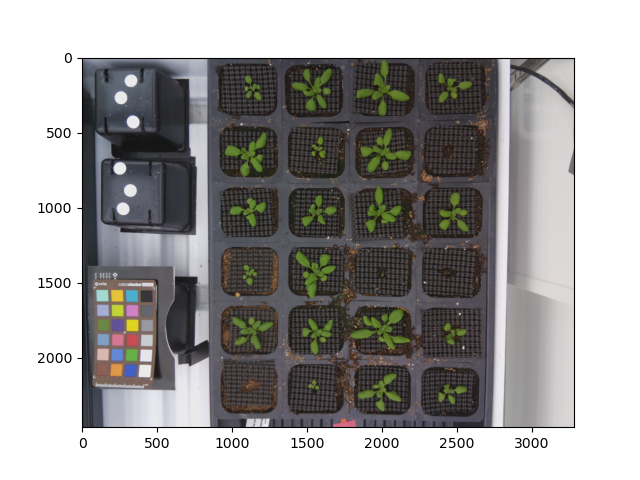

In [11]:
img, imgpath, imgname = pcv.readimage(filename=args.image1)

In [12]:
df, coord, spacing = pcv.transform.find_color_card(rgb_img=img)

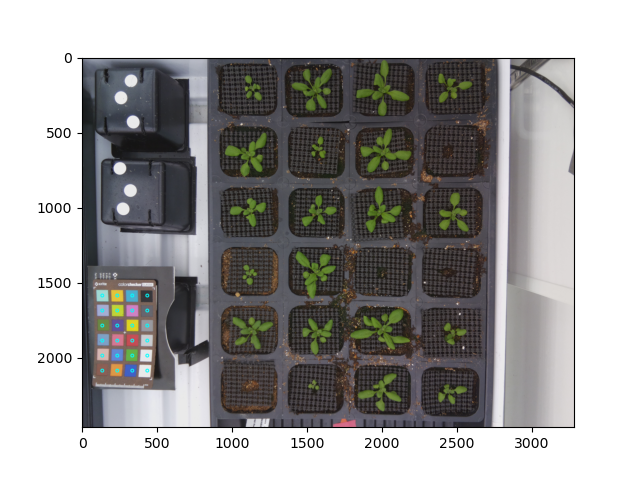

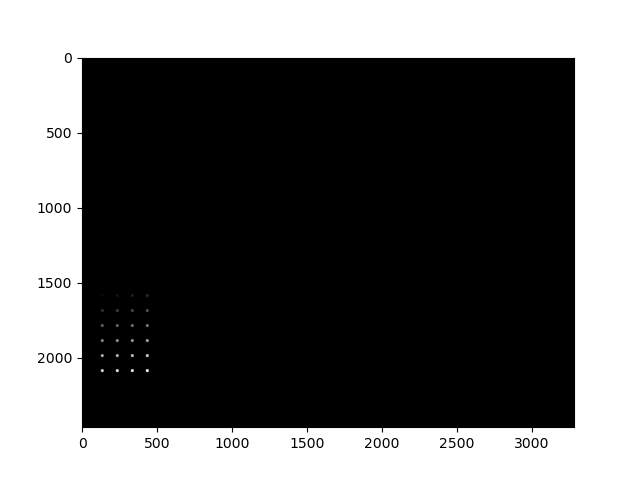

In [13]:
cc_mask = pcv.transform.create_color_card_mask(rgb_img=img, radius=10, start_coord=coord, spacing=spacing, nrows=6, ncols=4)

In [14]:
target_matrix = pcv.transform.std_color_matrix(pos=1)

In [20]:
mat_headers, source_matrix = pcv.transform.get_color_matrix(rgb_img=img, mask=cc_mask)

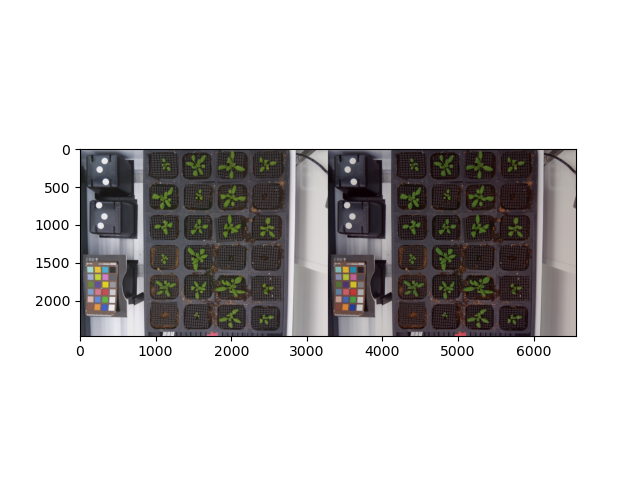

In [21]:
cc_img = pcv.transform.affine_color_correction(rgb_img=img, target_matrix=target_matrix, source_matrix=source_matrix)

In [ ]:
pcv.outputs.save_results(filename=args.result)